In [43]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_absolute_error
from pprint import pprint
import plotly.graph_objs as go
from plotly.offline import iplot
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn import model_selection


- _Load in the red wine data from the UCI ML website._

In [44]:
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns',20)

df = pd.read_csv('winequality-red.csv')

- _Let's investigate data set_

In [45]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


- _Let's check how the data is distributed_

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


- _Let’s have a look at data dimensionality, feature names, and feature types. (1599<- rows, 12<-colums)_

In [47]:
df.shape

(1599, 12)

- _Let’s printing out column names_

In [48]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'], dtype='object')

- _The describe method shows basic statistical characteristics of each numerical feature_

In [49]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [50]:
sorted_df=df.sort_values(by='quality', ascending=False)
sorted_df.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
495,10.7,0.350,0.53,2.60,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8
1403,7.2,0.330,0.33,1.70,0.061,3.0,13.0,0.99600,3.23,1.10,10.0,8
390,5.6,0.850,0.05,1.40,0.045,12.0,88.0,0.99240,3.56,0.82,12.9,8
1061,9.1,0.400,0.50,1.80,0.071,7.0,16.0,0.99462,3.21,0.69,12.5,8
1202,8.6,0.420,0.39,1.80,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,8
828,7.8,0.570,0.09,2.30,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8
481,9.4,0.300,0.56,2.80,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8
455,11.3,0.620,0.67,5.20,0.086,6.0,19.0,0.99880,3.22,0.69,13.4,8
1449,7.2,0.380,0.31,2.00,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8
440,12.6,0.310,0.72,2.20,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8


- _Get mean for all colum with highest mark_

In [51]:
print(df[df['quality'] == 8].mean())

fixed acidity            8.566667
volatile acidity         0.423333
citric acid              0.391111
residual sugar           2.577778
chlorides                0.068444
free sulfur dioxide     13.277778
total sulfur dioxide    33.444444
density                  0.995212
pH                       3.267222
sulphates                0.767778
alcohol                 12.094444
quality                  8.000000
dtype: float64


- _Create pivot\_table_

In [52]:
colum_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
df_pivot_table = df.pivot_table(colum_names,['quality'], aggfunc='median')

df_pivot_table

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,9.925,0.0905,0.035,0.997565,7.50,6.0,3.39,2.1,0.545,15.0,0.845
4,10.000,0.0800,0.090,0.996500,7.50,11.0,3.37,2.1,0.560,26.0,0.670
5,9.700,0.0810,0.230,0.997000,7.80,15.0,3.30,2.2,0.580,47.0,0.580
6,10.500,0.0780,0.260,0.996560,7.90,14.0,3.32,2.2,0.640,35.0,0.490
7,11.500,0.0730,0.400,0.995770,8.80,11.0,3.28,2.3,0.740,27.0,0.370
8,12.150,0.0705,0.420,0.994940,8.25,7.5,3.23,2.1,0.740,21.5,0.370


- _Corelation matrix_

In [53]:
corr_matrix = df.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

***
## Data visualization
***

- Data distribution

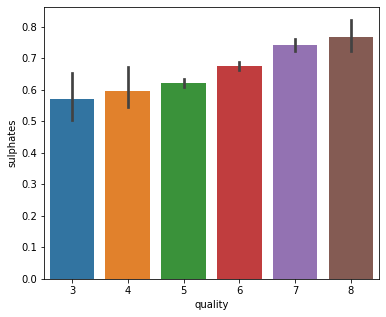

In [54]:
fig = plt.figure(figsize=(6, 5))
sns.barplot(x='quality', y='sulphates', data=df)
plt.show()

- Histograms

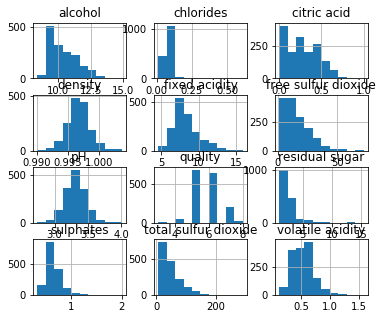

In [55]:
df.hist(bins=10,figsize=(6, 5))
plt.show()

- Density Plots

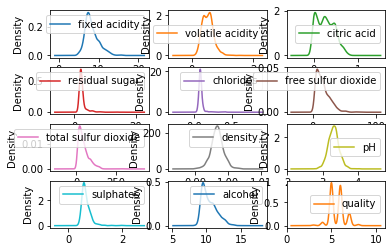

In [56]:
df.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

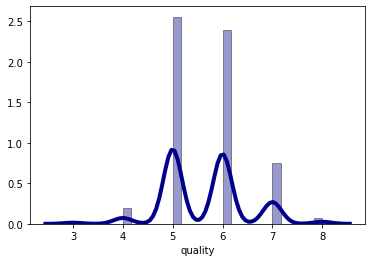

In [57]:
sns.distplot(df['quality'], hist=True, kde=True,
             bins='auto', color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

- Column names

In [58]:
colum_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

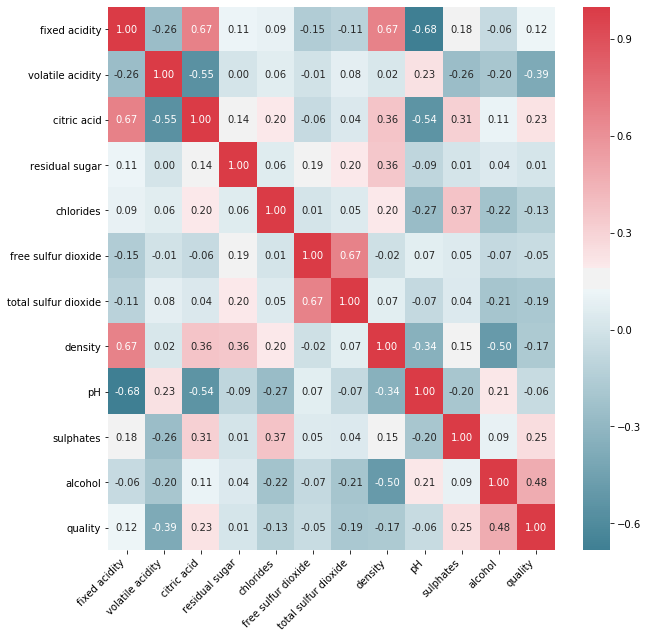

In [59]:
correlations = df.corr()
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
# Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f")
ax.set_xticklabels(
    colum_names,
    rotation=45,
    horizontalalignment='right'
);
ax.set_yticklabels(colum_names);
plt.show()

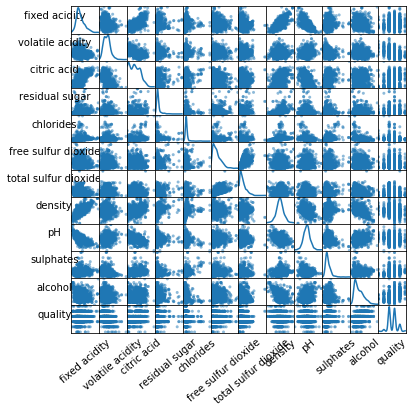

In [60]:
sm = scatter_matrix(df, figsize=(6, 6), diagonal='kde')
#Change label rotation
[s.xaxis.label.set_rotation(40) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]
#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.6,0.5) for s in sm.reshape(-1)]
#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()

***
## Data Preprocessing
***

+ Making binary classificaion for the response variable.

In [61]:
# Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad


* Now lets assign a labels to our quality variable

In [62]:
label_quality = LabelEncoder()
# Bad becomes 0 and good becomes 1
df['quality'] = label_quality.fit_transform(df['quality'])
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

* Now seperate the dataset as response variable and feature variabes

In [63]:

X = df.drop('quality', axis=1)
y = df['quality']

* Train and Test splitting of data

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

* Applying Standard scaling to get optimized result

In [65]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

***
## Machine learning algorithms
***

In [66]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

_Prepare configuration for cross validation test harness_

SupportVectorClassifier: 0.873364 (0.024056)
StochasticGradientDecentC: 0.839739 (0.029603)
RandomForestClassifier: 0.902288 (0.023954)
DecisionTreeClassifier: 0.847558 (0.033112)
GaussianNB: 0.826446 (0.025753)
KNeighborsClassifier: 0.860845 (0.026717)
AdaBoostClassifier: 0.866351 (0.039970)
LogisticRegression: 0.871014 (0.028362)


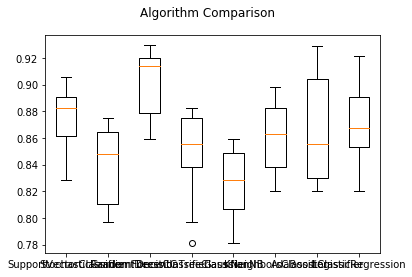

In [67]:
seed = 7
# prepare models
models = []
models.append(('SupportVectorClassifier', SVC()))
models.append(('StochasticGradientDecentC', SGDClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('LogisticRegression', LogisticRegression()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**1) Support Vector Classifier (svc)**


In [68]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

_Grid Search CV (finding best parameters for svc model)_

In [69]:
def svc_param_selection(X, y, nfolds):
    param = {
        'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
        'kernel': ['linear', 'rbf'],
        'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4]
    }
    grid_search = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=nfolds)
    grid_search.fit(X,  y)
    return grid_search.best_params_

In [70]:
svc_param_selection(X_train, y_train,10)

{'C': 1.3, 'gamma': 1.3, 'kernel': 'rbf'}

_Best params had found  **{'C': 1.3, 'gamma': 1.3, 'kernel': 'rbf'}**_

_Let's run our SVC again with the best parameters._

In [71]:

svc2 = SVC(C = 1.3, gamma =  1.3, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print('Confusion matrix')
print(confusion_matrix(y_test, pred_svc2))
print('Classification report')
print(classification_report(y_test, pred_svc2))
print('Accuracy score',accuracy_score(y_test, pred_svc2))


Confusion matrix
[[285   2]
 [ 18  15]]
Classification report
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       287
           1       0.88      0.45      0.60        33

    accuracy                           0.94       320
   macro avg       0.91      0.72      0.78       320
weighted avg       0.93      0.94      0.93       320

Accuracy score 0.9375


**2) Stochastic Gradient Decent Classifier**

In [86]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=60)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

**3) Random Forest Classifier**


In [73]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=20,
                             random_state=0)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

**4) KNeighborsClassifier**

In [85]:
n_neighbors = 2

for weights in ['uniform', 'distance']:
    nbrs = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
    nbrs.fit(X_train,y_train)
    pred_nbrs = nbrs.predict(X_test)
    print('KNeighborsClassifier', weights)
    print(classification_report(y_test, pred_nbrs))


KNeighborsClassifier uniform
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       287
           1       0.56      0.42      0.48        33

    accuracy                           0.91       320
   macro avg       0.75      0.69      0.72       320
weighted avg       0.90      0.91      0.90       320

KNeighborsClassifier distance
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       287
           1       0.51      0.70      0.59        33

    accuracy                           0.90       320
   macro avg       0.74      0.81      0.77       320
weighted avg       0.92      0.90      0.91       320



**5) AdaBoostClassifier**

In [75]:
ada_classifier = AdaBoostClassifier(n_estimators=100)
ada_classifier.fit(X_train, y_train)
pred_ada = ada_classifier.predict(X_test)

**6) Evaluate model**

In [76]:

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(mean_absolute_error(test_labels,predictions)))
    print('Accuracy = {:0.2f}%.'.format(accuracy_score(test_labels,predictions)*100))

In [77]:
evaluate(svc,X_test,y_test)
evaluate(svc2,X_test,y_test)
evaluate(sgd,X_test,y_test)
evaluate(rfc,X_test,y_test)
evaluate(ada_classifier,X_test,y_test)

Model Performance
Average Error: 0.0781 degrees.
Accuracy = 92.19%.
Model Performance
Average Error: 0.0625 degrees.
Accuracy = 93.75%.
Model Performance
Average Error: 0.1187 degrees.
Accuracy = 88.12%.
Model Performance
Average Error: 0.0625 degrees.
Accuracy = 93.75%.
Model Performance
Average Error: 0.0781 degrees.
Accuracy = 92.19%.


**7) Cross Validation**

In [78]:
scores = cross_val_score(ada_classifier,X_test,y_test, cv=5)
scores.mean()

0.9030570818070818

**8) Feature importance**

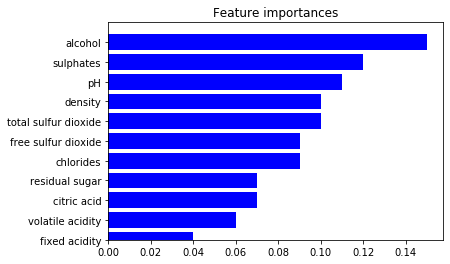

In [79]:
importance=ada_classifier.feature_importances_

std = np.std([tree.feature_importances_ for tree in ada_classifier.estimators_],
             axis=0)
indices = np.argsort(importance)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importance[indices],
       color="b",  align="center")

plt.yticks(range(X.shape[1]), colum_names)
plt.ylim([0, X.shape[1]])
plt.show()